<a href="https://colab.research.google.com/github/Bhuvanjeet/Household-Power-Consumption-Prediction/blob/master/household_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Household Power Consumption Prediction**

Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

This dataset contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


Attribute Information:

1. date: Date in format dd/mm/yyyy
2.time: time in format hh:mm:ss
3.global_active_power: household global minute-averaged active power (in kilowatt)
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5.voltage: minute-averaged voltage (in volt)
6.global_intensity: household global minute-averaged current intensity (in ampere)
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

To predict:- Global Active Power.

Source:- http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption 

**Machine Learning Algorithms Used:**

**1-Linear Regression**

**2-Deep Neural Network**

**Exploratory Data Analysis - EDA**

In [0]:
#importing required libraries
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from google.colab import files   

In [3]:
uploaded=files.upload()

Saving household_power_consumption.txt to household_power_consumption.txt


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "household_power_consumption.txt" with length 132960755 bytes


In [0]:
import io

In [0]:
df=pd.read_csv(io.StringIO(uploaded['household_power_consumption.txt'].decode('utf-8')),low_memory=False,sep=";",parse_dates={'DateTime':['Date','Time']},infer_datetime_format=True,index_col='DateTime')

parse_dates is used to combine Date and Time columns together into a single column

infer_datetime_format changes the dtype to DateTime

index_col makes this column as the index of this dataframe

We could also extract hours from 'Time' column and 'month' and 'year' from 'Date' column and drop these two columns but in that case, no. of duplicates were coming low as compared when these two columns are combined together, means more efficient data cleaning. Also it eases time-series analysis. That's why I chose to combine them into one

In [7]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [0]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [11]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [0]:
df['Global_active_power'].fillna(df['Global_active_power'].mean(),inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(),inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(),inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(),inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(),inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(),inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(),inplace=True)

In [13]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [14]:
sum(df.duplicated())

168560

In [0]:
df.drop_duplicates(inplace=True)

In [16]:
sum(df.duplicated())

0

**Data Visualization**

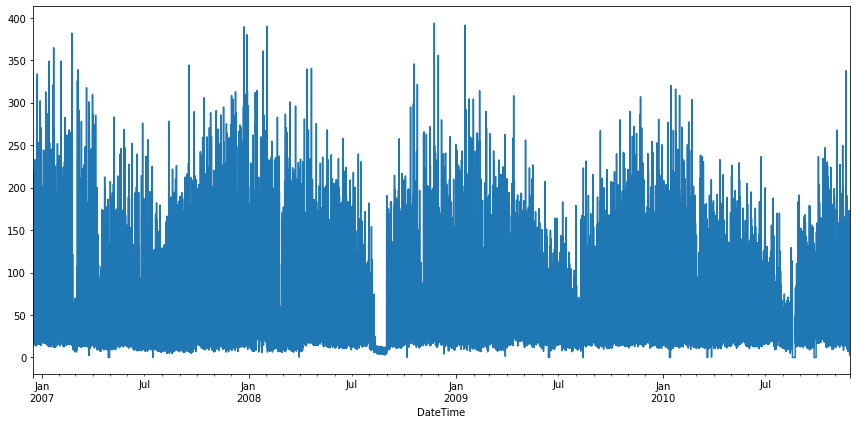

In [17]:
#resampling the data for every hour
plt.figure(figsize=(12,6))
df.Global_active_power.resample('1H').sum().plot()  #sum() gives the sum of global_active_power for an hour
plt.tight_layout()

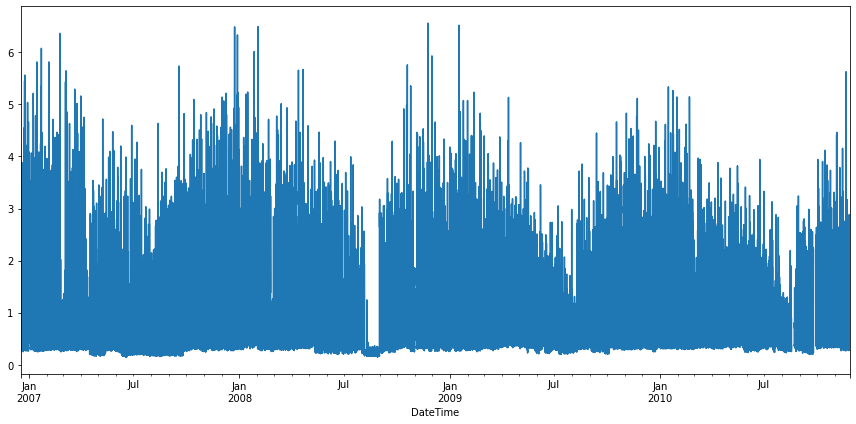

In [18]:
plt.figure(figsize=(12,6))
df.Global_active_power.resample('1H').mean().plot()  #mean() gives the sum of global_active_power for an hour
plt.tight_layout()

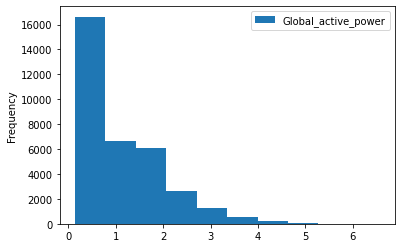

In [19]:
df.Global_active_power.resample('1H').mean().plot(kind='hist',legend=True)

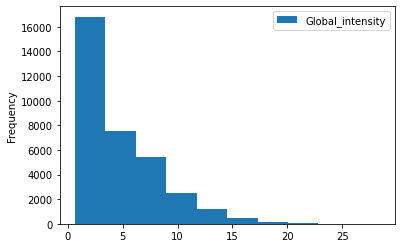

In [20]:
df.Global_intensity.resample('1H').mean().plot(kind='hist',legend=True)

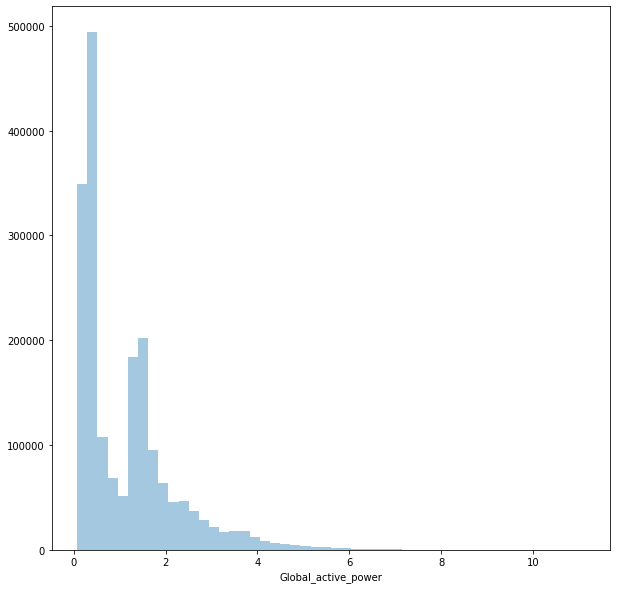

In [21]:
plt.figure(figsize=(10,10))
sns.distplot(df['Global_active_power'],kde=False,bins=50)

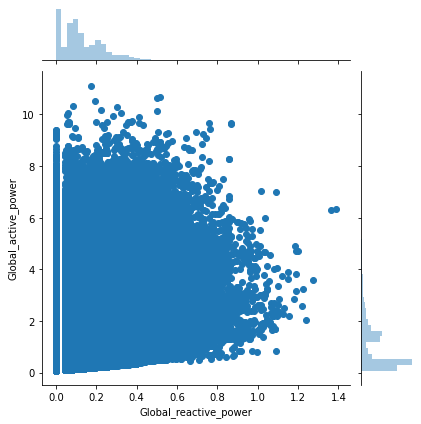

In [22]:
#scatter charts
sns.jointplot(x='Global_reactive_power',y='Global_active_power',data=df,kind='scatter')

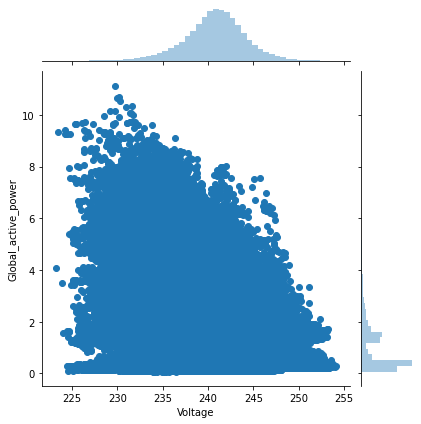

In [23]:
sns.jointplot(x='Voltage',y='Global_active_power',data=df,kind='scatter')

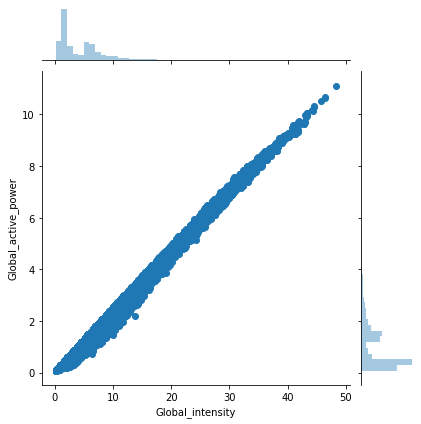

In [24]:
sns.jointplot(x='Global_intensity',y='Global_active_power',data=df,kind='scatter')

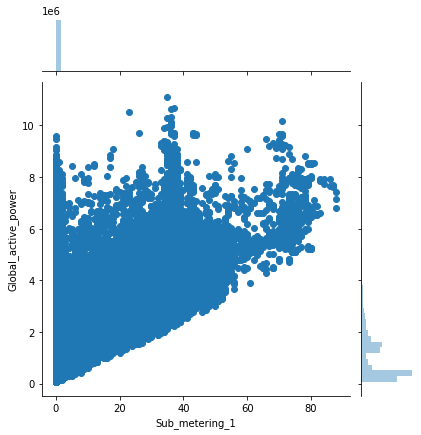

In [25]:
sns.jointplot(x='Sub_metering_1',y='Global_active_power',data=df,kind='scatter')

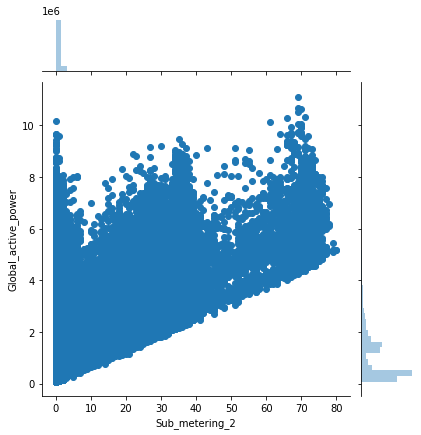

In [26]:
sns.jointplot(x='Sub_metering_2',y='Global_active_power',data=df,kind='scatter')

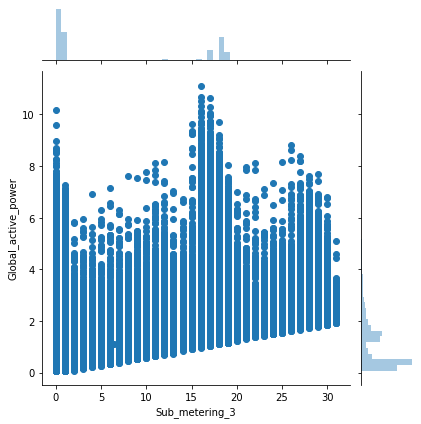

In [27]:
sns.jointplot(x='Sub_metering_3',y='Global_active_power',data=df,kind='scatter')

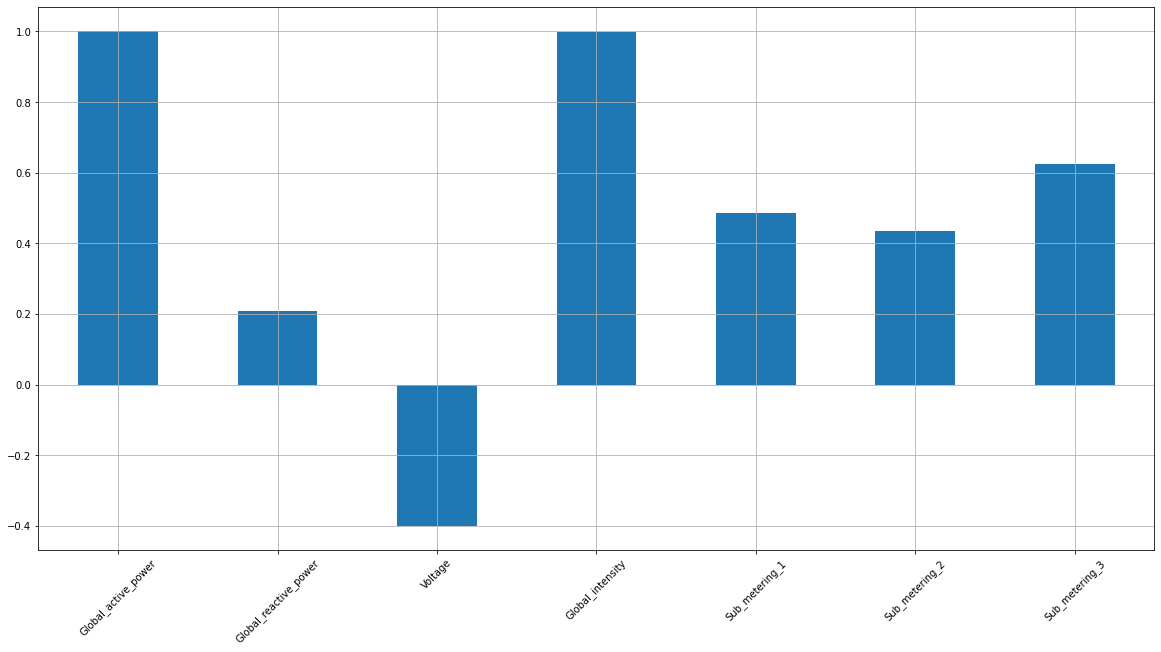

In [28]:
plt.figure(figsize=(20,10))
df.corrwith(df['Global_active_power']).plot.bar(grid=True,rot=45)

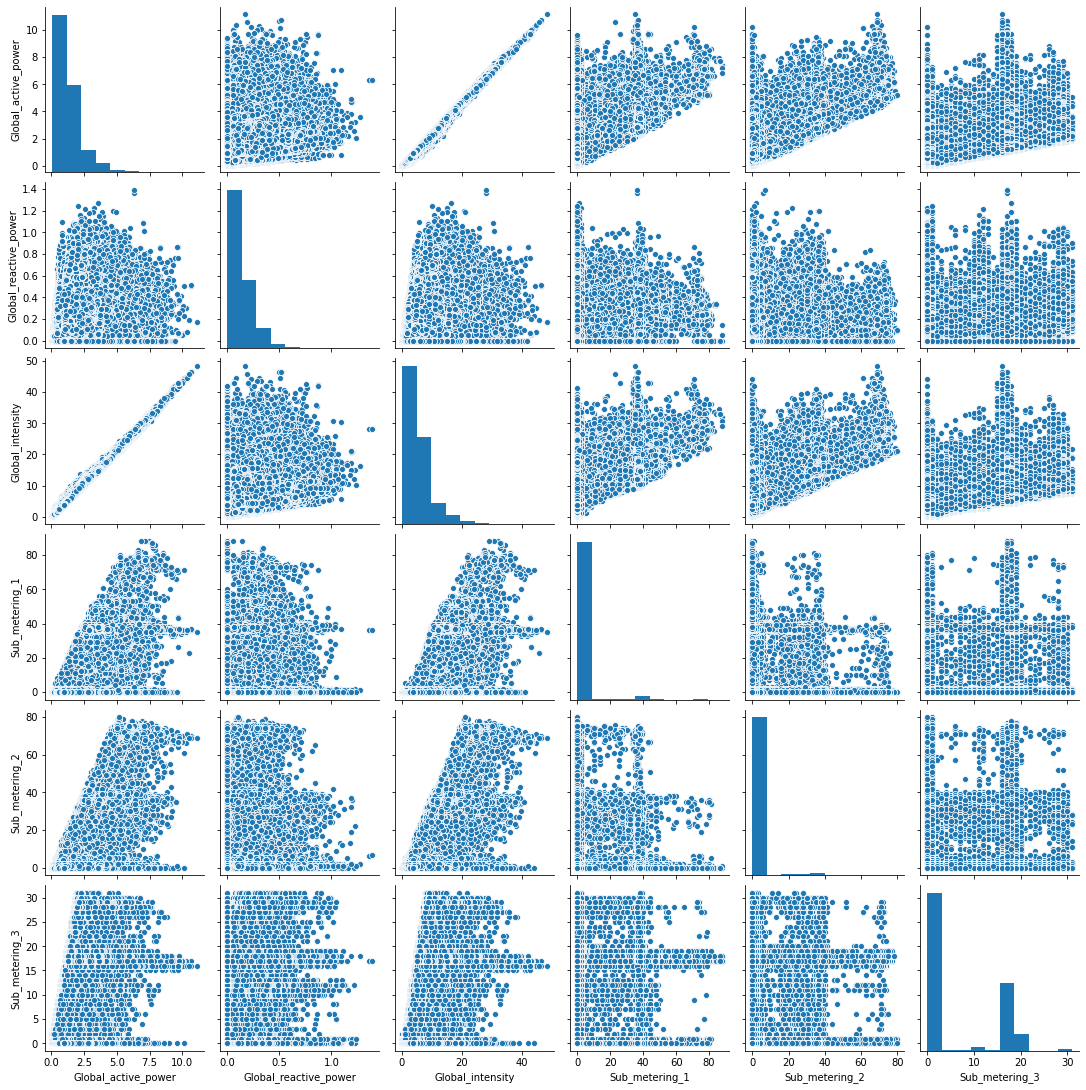

In [93]:
#pairwise relationship across the whole dataset
sns.pairplot(df)

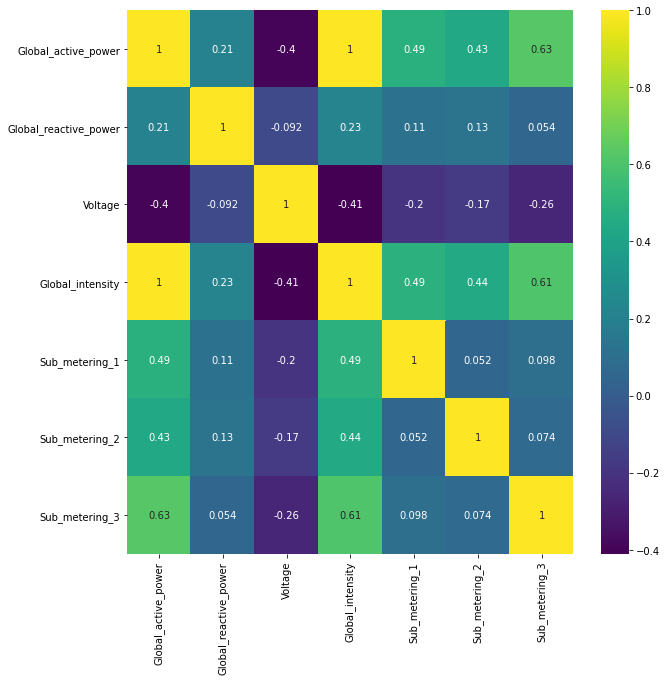

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
#plots correlation as color encoded matrices.

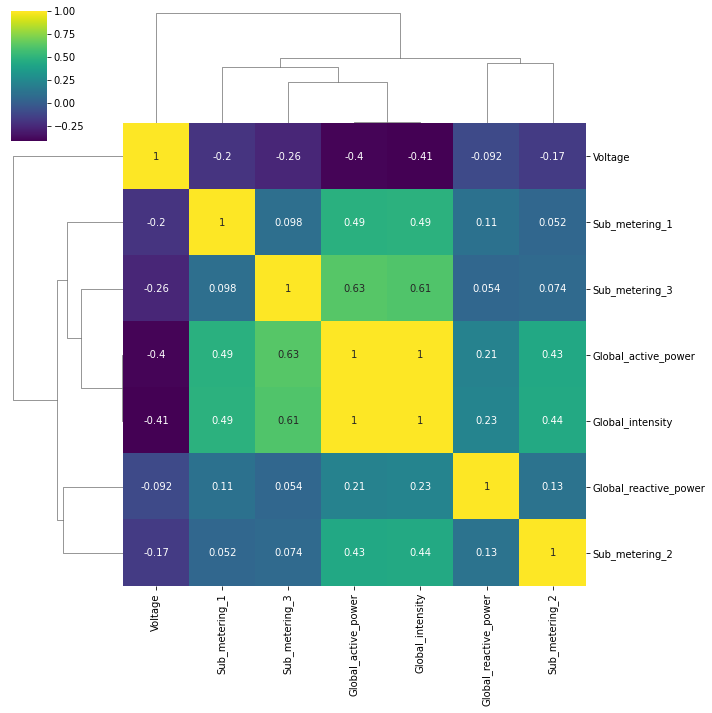

In [30]:
sns.clustermap(df.corr(),cmap='viridis',annot=True)

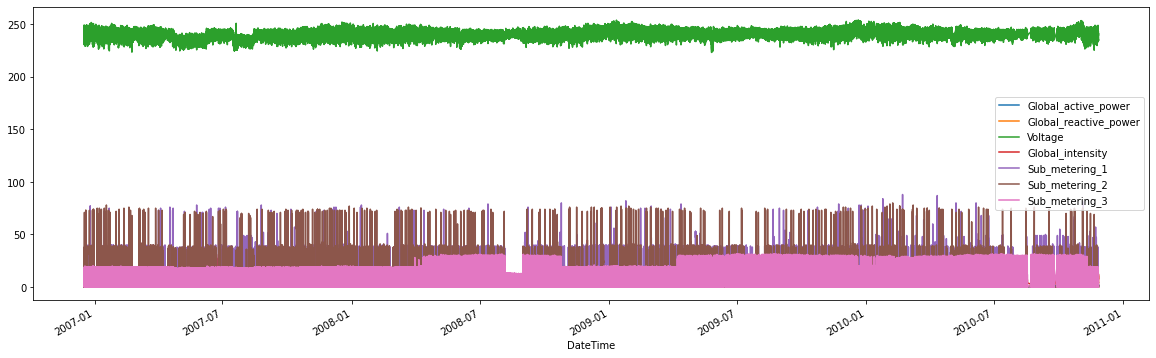

In [31]:
#time-series analysis
df.plot(figsize=(20, 6))
plt.show()

**Analysis from Data Visualization**

From the above visualizations , we see that 'Voltage' has least correlation with 'Global_active_power' so we can drop it as it won't help us that much in predictions.



In [0]:
df.drop('Voltage',axis=1,inplace=True)

In [33]:
df.head()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,
2006-12-16 17:24:00,4.216,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,15.8,0.0,1.0,17.0


**Train and Test Split(67:33)**

In [0]:
X=df.drop('Global_active_power',axis=1)
y=df['Global_active_power']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

**Data Preprocessing**

Done after splitting the data into train and test sets. The reason is to avoid any data leakage.

In [0]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train))
X_test2 = pd.DataFrame(scaler.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

**Linear Regression**

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions_linear = lm.predict(X_test)

In [38]:
from sklearn import metrics 
print('Results of Linear Regression:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions_linear))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predictions_linear))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,predictions_linear)))

Results of Linear Regression:

Mean Absolute Error: 0.028363155393624145
Mean Squared Error: 0.0019313199623858795
Root Mean Squared Error: 0.04394678557512346


In [39]:
lm.intercept_

0.05221692258358357

In [40]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_linear})
df_result

,Actual,Predicted
DateTime,,
2008-04-06 13:48:00,1.520,1.513481
2009-07-20 00:06:00,0.222,0.220099
2009-07-07 15:11:00,1.058,1.052401
2010-06-04 19:44:00,0.346,0.347391
2008-07-27 22:01:00,2.392,2.418632
...,...,...
2007-09-07 18:53:00,0.490,0.550193
2006-12-29 13:53:00,1.704,1.674983
2010-08-31 02:37:00,0.226,0.241166


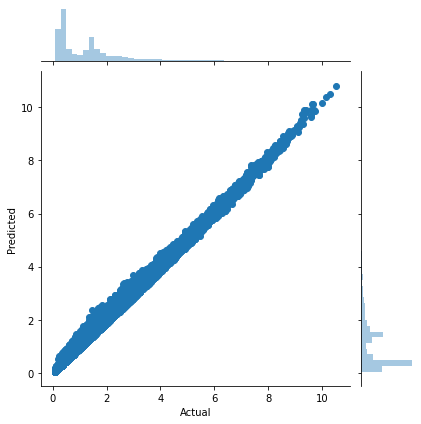

In [41]:
sns.jointplot(x='Actual',y='Predicted',data=df_result,kind='scatter')

**Deep Neural Network**

In [47]:
!pip install tensorflow-gpu

In [48]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [50]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model=Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

In [0]:
model.compile(optimizer='rmsprop',loss='mse')

In [0]:
X_train=X_train.values;
y_train=y_train.values;

In [66]:
model.fit(X_train,y_train,epochs=20)

Train on 1277488 samples
Epoch 1/20
1277488/1277488 [==============================] - 103s 80us/sample - loss: 0.0018
Epoch 2/20
1277488/1277488 [==============================] - 103s 80us/sample - loss: 0.0017
Epoch 3/20
1277488/1277488 [==============================] - 103s 80us/sample - loss: 0.0017
Epoch 4/20
1277488/1277488 [==============================] - 104s 81us/sample - loss: 0.0016
Epoch 5/20
1277488/1277488 [==============================] - 105s 82us/sample - loss: 0.0016
Epoch 6/20
1277488/1277488 [==============================] - 104s 81us/sample - loss: 0.0016
Epoch 7/20
1277488/1277488 [==============================] - 102s 80us/sample - loss: 0.0015
Epoch 8/20
1277488/1277488 [==============================] - 104s 81us/sample - loss: 0.0015
Epoch 9/20
1277488/1277488 [==============================] - 102s 80us/sample - loss: 0.0015
Epoch 10/20
1277488/1277488 [==============================] - 102s 80us/sample - loss: 0.0015
Epoch 11/20
1277488/1277488 [=====

In [67]:
model.history.history

{'loss': [0.0017857841801000038,
  0.001709092037943439,
  0.0016724510334694418,
  0.0016375413550812656,
  0.0016154317781070116,
  0.0015688748161628002,
  0.0015454029871576358,
  0.0015423766143425732,
  0.0015440114136607234,
  0.001547582795545666,
  0.0015517331993750677,
  0.0015596344447957548,
  0.001563366045617743,
  0.0015617254589724875,
  0.001559967434149547,
  0.0015496232670772008,
  0.0015387515281806185,
  0.0015290420130684892,
  0.0015265350535423711,
  0.0015267993799687521]}

In [0]:
loss_df=pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Loss')

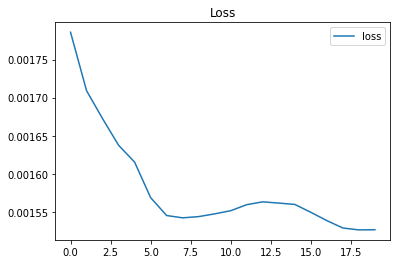

In [70]:
loss_df.plot()
plt.title('Loss')

In [0]:
X_test=X_test.values;
y_test=y_test.values;
predictions_neural=model.predict(X_test)

In [75]:
from sklearn import metrics 
print('Results of Deep Neural Network:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions_neural))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predictions_neural))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,predictions_neural)))

Results of Deep Neural Network:

Mean Absolute Error: 0.02289871649623026
Mean Squared Error: 0.0013376423045763871
Root Mean Squared Error: 0.036573792592188015


In [0]:
df_actual = pd.DataFrame({'Actual': y_test})

In [0]:
predict_ser=pd.Series(predictions_neural.reshape(629211,))

In [0]:
df1_result=pd.concat([df_actual,predict_ser],axis=1)

In [85]:
df1_result

,Actual,0
0,1.520,1.525644
1,0.222,0.229546
2,1.058,1.056341
3,0.346,0.331979
4,2.392,2.412169
...,...,...
629206,0.490,0.504721
629207,1.704,1.689542
629208,0.226,0.257961
629209,1.444,1.477802


In [0]:
df1_result.columns=['Actual','Predicted']

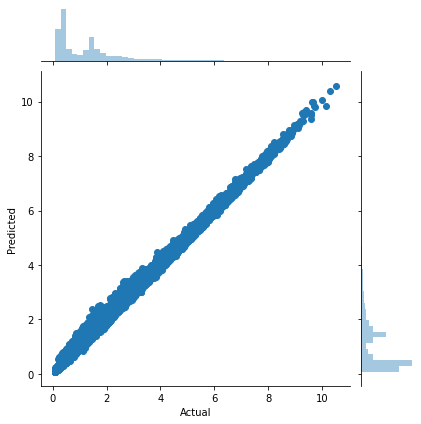

In [89]:
sns.jointplot(x='Actual',y='Predicted',data=df1_result)

**Results and Comparison**

In [92]:
from sklearn import metrics 
print('Results of Linear Regression:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions_linear))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predictions_linear))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,predictions_linear)))
print('\nResults of Deep Neural Network:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions_neural))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predictions_neural))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,predictions_neural)))

Results of Linear Regression:

Mean Absolute Error: 0.028363155393624145
Mean Squared Error: 0.0019313199623858795
Root Mean Squared Error: 0.04394678557512346

Results of Deep Neural Network:

Mean Absolute Error: 0.02289871649623026
Mean Squared Error: 0.0013376423045763871
Root Mean Squared Error: 0.036573792592188015
